# SQLITE & POSTGRES
[datacarpentry.org](https://datacarpentry.org/python-ecology-lesson/09-working-with-sql/index.html)

In [1]:
import pandas as pd 
import sys   
sys.path.append('/Users/oliverdreger/Documents/mygit/')
import omdutils as omd

In [2]:
print('Version omdutils: {}'.format(omd.__version__))


Version omdutils: 8.6.2022


In [34]:
amtrak = pd.read_csv('/Users/oliverdreger/Downloads/AmtrakBig_raw.csv', 
    parse_dates=['Month'])
amtrak['Month'] = '1-' + amtrak['Month']
amtrak.Month = pd.to_datetime(amtrak.Month).dt.date
amtrak.info()
display(amtrak)
omd.to_postgres(amtrak, 'amtrak', 'Datasets')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Month      159 non-null    object
 1   Ridership  159 non-null    int64 
 2   t          159 non-null    int64 
 3   Season     159 non-null    object
dtypes: int64(2), object(2)
memory usage: 5.1+ KB


,Month,Ridership,t,Season
0,1991-01-01,1709,1,Jan
1,1991-02-01,1621,2,Feb
2,1991-03-01,1973,3,Mar
3,1991-04-01,1812,4,Apr
4,1991-05-01,1975,5,May
...,...,...,...,...
154,2003-11-01,2076,155,Nov
155,2003-12-01,2141,156,Dec
156,2004-01-01,1832,157,Jan
157,2004-02-01,1838,158,Feb


In [38]:
amtrak.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159 entries, 1991-01-01 to 2004-03-01
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Ridership  159 non-null    int64 
 1   t          159 non-null    int64 
 2   Season     159 non-null    object
dtypes: int64(2), object(1)
memory usage: 5.0+ KB


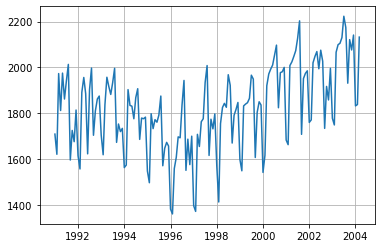

In [39]:
import matplotlib.pyplot as plt 

# amtrak.set_index(['Month'], inplace=True)
plt.plot(amtrak['Ridership'])
plt.grid(True)

In [3]:
print(help(omd.from_sqlite))

Help on function from_sqlite in module omdutils:

from_sqlite(sql: str, database: str) -> pandas.core.frame.DataFrame
    This function pulls data from a SQLite database and returns a dataframe object
    
    Args:
        sql (str): This SQL statement determines which data is pulled
        database (str): The name of the database from which to pull the data

None


In [4]:
df = omd.from_sqlite(sql='select * from titanic_train limit 3',
                     database='datasets.db')
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S


In [19]:
df = omd.from_sqlite(sql='''select * from fraud''',
                     database='datasets.db')
df


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0,,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,,0,0,A.5. 3236,8.05,,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.25,,S
416,1308,3,"Ware, Mr. Frederick",male,,0,0,359309,8.05,,S


In [54]:
air = pd.read_csv('/Users/oliverdreger/Downloads/AIR.csv')
air['DATE'] = pd.to_datetime([i[0:3] + '19' + i[3:5] for i in air['DATE']])
# air.set_index('DATE', inplace=True)
air['DATE'] = air['DATE'].dt.date
air.info()
air


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    144 non-null    object
 1   AIR     144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


,DATE,AIR
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


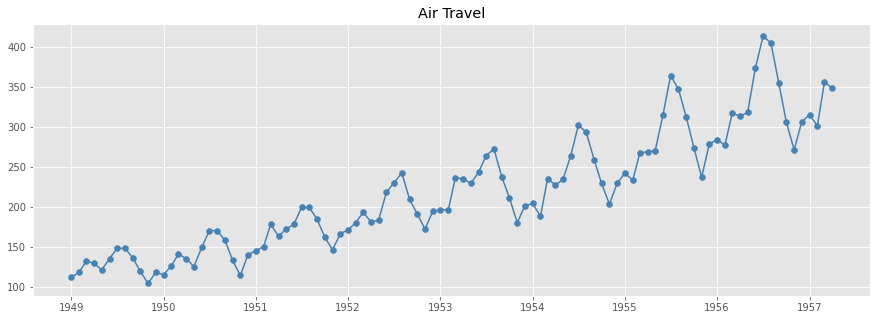

In [52]:
import matplotlib.pyplot as plt 

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(y=air['AIR'][:100], x=air['DATE'][:100], ls='-', color='steelblue')
ax.plot(air.DATE[:100], air.AIR[:100], color='steelblue')
ax.set_title('Air Travel');

In [48]:
omd.to_postgres(dataframe=air, dataframe_name='air', database='Datasets')

In [49]:
air = omd.from_postgres(sql='select * from air', database='Datasets')
air

,DATE,AIR
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [4]:
df = omd.from_postgres(sql='select * from bike_rentals_cleaned limit 3',
                       database='Datasets')
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     3 non-null      int64  
 1   season      3 non-null      float64
 2   yr          3 non-null      float64
 3   mnth        3 non-null      float64
 4   holiday     3 non-null      float64
 5   weekday     3 non-null      float64
 6   workingday  3 non-null      float64
 7   weathersit  3 non-null      int64  
 8   temp        3 non-null      float64
 9   atemp       3 non-null      float64
 10  hum         3 non-null      float64
 11  windspeed   3 non-null      float64
 12  cnt         3 non-null      int64  
dtypes: float64(10), int64(3)
memory usage: 440.0 bytes


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1.0,0.0,1.0,0.0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,1.0,0.0,1.0,0.0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,1.0,0.0,1.0,0.0,1.0,1.0,1,0.196364,0.189405,0.437273,0.248309,1349


In [9]:
# SQLite
df = omd.from_sqlite('''select * from titanic_test limit 20''', 'datasets.db')


In [12]:
df


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,,S


In [ ]:
# SQLite
omd.to_sqlite(df, 'omd', 'datasets.db')


In [58]:
# POSTGRESQL
omd.to_postgres(df, 'omd', 'Datasets')


In [14]:
print(help(omd.from_postgres))


Help on function from_postgres in module omdutils:

from_postgres(sql, database)
    This function pulls data from a POSTGRES database and returns a dataframe object
    
    Args:
        sql (str): This SQL statement determines which data is pulled
        database (str): This is the name of the database from which to pull the data

None


In [13]:
# POSTGRESQL
df = omd.from_postgres(
    sql='''select * from titanic_train''', database='Datasets')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,None,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,None,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,None,S


In [3]:
print(help(omd.from_sqlite))


Help on function from_sqlite in module omdutils:

from_sqlite(sql: str, database: str) -> pandas.core.frame.DataFrame
    This function pulls data from a SQLite database and returns a dataframe object
    
    Args:
        sql (str): This SQL statement determines which data is pulled
        database (str): The name of the database from which to pull the data

None


In [15]:
fraud = omd.from_sqlite(
    sql='select * from fraud_detection_bank_dataset', database='datasets.db')
print('shape: ', fraud.shape)
fraud.columns


shape:  (20468, 114)


Index(['Column1', 'col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5',
       'col_6', 'col_7', 'col_8',
       ...
       'col_103', 'col_104', 'col_105', 'col_106', 'col_107', 'col_108',
       'col_109', 'col_110', 'col_111', 'targets'],
      dtype='object', length=114)

In [16]:
fraud = omd.from_postgres(
    sql='select * from fraud_detection_bank_dataset', database='Datasets')
print('shape: ', fraud.shape)
fraud.columns

shape:  (20468, 114)


Index(['Unnamed: 0', 'col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5',
       'col_6', 'col_7', 'col_8',
       ...
       'col_103', 'col_104', 'col_105', 'col_106', 'col_107', 'col_108',
       'col_109', 'col_110', 'col_111', 'targets'],
      dtype='object', length=114)

In [5]:
print(help(omd.to_sqlite))


Help on function to_sqlite in module omdutils:

to_sqlite(dataframe: str, dataframe_name: str, database: str)
    This function creates a table in selected database and writes data from dataframe to the new table.
    
    Args:
        dataframe (str): The dataframe that is saved as a table
        dataframe_name (str): The name of the new database table
        database (str): The name of the database where to create the table. Include path if different from
                        current location (e.g. database = "/Users/johnsmith/Documents/datasets.db")

None


In [6]:
omd.to_sqlite(dataframe=fraud.head(10),
              dataframe_name='fraud_small_sample',
              database='datasets.db')
